This notebook creates a network of FS neurons and runs the simulation with and without gap junctions.

First we define a cubic millimeter volume for the FS neurons.

In [1]:
import os
os.environ["SNUDDA_DATA"] = "../../../../BasalGangliaData/data/"
assert os.path.isdir(os.getenv("SNUDDA_DATA")), f"You need to have BasalGangliaData installed for this example. You can run this example without it, but then do not execute this cell."

network_path = os.path.join("FS_network_1")

In [2]:
from snudda.place import create_cube_mesh

mesh_file = os.path.join(network_path, "mesh", "volume.obj")
create_cube_mesh(mesh_file, [0,0,0], 1e-3, "FS network volume")

Create config file defining the network. Here 1050 FS neurons are added.

In [3]:
from snudda import SnuddaInit

si = SnuddaInit(network_path=network_path, random_seed=123)

si.define_structure(struct_name="StriatalVolume", struct_mesh=mesh_file, d_min=15e-6, mesh_bin_width=50e-6)

# Should be 1050 neurons, temp reducing it to 50 neurons for runtime of simulation while developing -- OBS increase to 1050!
si.add_neurons(name="FS", num_neurons=50, volume_id="StriatalVolume",
               neuron_dir=os.path.join("$DATA","neurons","striatum","fs"))

cluster_FS_synapses = True
FS_gGABA = [1.1e-9, 1.5e-9]
FS_gGapJunction = [0.5e-9, 0.1e-9]

si.add_neuron_target(neuron_name="FS",
                     target_name="FS",
                     connection_type="GABA",
                     dist_pruning=None,
                     f1=0.15, soft_max=5, mu2=2, a3=1,
                     conductance=FS_gGABA,
                     cluster_synapses=cluster_FS_synapses,
                     mod_file="tmGabaA",
                     channel_param_dictionary={"tau1": (1.33e-3, 1e3),
                                               "tau2": (5.7e-3, 1e3)})
    
si.add_neuron_target(neuron_name="FS",
                     target_name="FS",
                     connection_type="gap_junction",
                     dist_pruning=None,
                     f1=0.7, soft_max=8, mu2=2, a3=1.0,
                     conductance=FS_gGapJunction,
                     cluster_synapses=False,
                     channel_param_dictionary=None)

si.write_json()

Adding neurons: FS from dir /home/hjorth/HBP/BasalGangliaData/data/neurons/striatum/fs
Writing FS_network_1/network-config.json


In [4]:
from snudda import Snudda
snd = Snudda(network_path=network_path)
snd.create_network()

Placing neurons
Network path: FS_network_1
Reading SNUDDA_DATA=None from FS_network_1/network-config.json
Reading SNUDDA_DATA=../../../../BasalGangliaData/data/ from FS_network_1/network-synapses.hdf5
Generating 323771 points for FS_network_1/mesh/volume.obj
n_points = 307864, previous close_pairs = 666959
n_points = 292773, previous close_pairs = 549747
n_points = 278472, previous close_pairs = 457599
n_points = 264942, previous close_pairs = 383186
n_points = 252170, previous close_pairs = 320717
n_points = 240150, previous close_pairs = 270638
n_points = 228884, previous close_pairs = 226066
n_points = 218368, previous close_pairs = 190632
n_points = 208609, previous close_pairs = 160979
n_points = 199628, previous close_pairs = 133764
n_points = 191439, previous close_pairs = 111739
n_points = 183984, previous close_pairs = 96081
n_points = 177246, previous close_pairs = 81933
n_points = 171212, previous close_pairs = 69236
n_points = 165873, previous close_pairs = 57916
n_points =

In [5]:
import os
from snudda.input import SnuddaInput
si = SnuddaInput(network_path=network_path, 
                 input_config_file="example-FS-input.json",
                 verbose=False)
si.generate()

Reading SNUDDA_DATA=None from FS_network_1/network-config.json
Reading SNUDDA_DATA=../../../../BasalGangliaData/data/ from FS_network_1/network-synapses.hdf5
!!! Warning, combining definition of thalamic with thalamic input for neuron FS_0 0 (meta modified by input_config)
!!! Warning, combining definition of thalamic with thalamic input for neuron FS_2 1 (meta modified by input_config)
!!! Warning, combining definition of thalamic with thalamic input for neuron FS_3 2 (meta modified by input_config)
!!! Warning, combining definition of thalamic with thalamic input for neuron FS_2 3 (meta modified by input_config)
!!! Warning, combining definition of thalamic with thalamic input for neuron FS_2 4 (meta modified by input_config)
!!! Warning, combining definition of thalamic with thalamic input for neuron FS_0 5 (meta modified by input_config)
!!! Warning, combining definition of thalamic with thalamic input for neuron FS_1 6 (meta modified by input_config)
!!! Warning, combining definit

In [6]:
!nrnivmodl $SNUDDA_DATA/neurons/mechanisms

/home/hjorth/HBP/Snudda/examples/notebooks/FS-network
Mod files: "../../../../BasalGangliaData/data//neurons/mechanisms/../../../../BasalGangliaData/data//neurons/mechanisms/bk_ch.mod" "../../../../BasalGangliaData/data//neurons/mechanisms/../../../../BasalGangliaData/data//neurons/mechanisms/bk_fs.mod" "../../../../BasalGangliaData/data//neurons/mechanisms/../../../../BasalGangliaData/data//neurons/mechanisms/bk_ms.mod" "../../../../BasalGangliaData/data//neurons/mechanisms/../../../../BasalGangliaData/data//neurons/mechanisms/ca_ch.mod" "../../../../BasalGangliaData/data//neurons/mechanisms/../../../../BasalGangliaData/data//neurons/mechanisms/cadyn_fs.mod" "../../../../BasalGangliaData/data//neurons/mechanisms/../../../../BasalGangliaData/data//neurons/mechanisms/cadyn_ms.mod" "../../../../BasalGangliaData/data//neurons/mechanisms/../../../../BasalGangliaData/data//neurons/mechanisms/cal12_ms.mod" "../../../../BasalGangliaData/data//neurons/mechanisms/../../../../BasalGangliaData/da

In [7]:
!mpiexec -n 2 snudda simulate FS_network_1 --time 1

args.ipython_profile = None
args.ipython_profile = None
numprocs=2
args: Namespace(action='simulate', path='FS_network_1', network_file=None, input_file=None, output_file=None, time=1.0, snudda_data=None, simulation_config=None, record_volt=True, randomseed=None, neuromodulation=None, disable_synapses=None, disable_gj=None, mech_dir=None, profile=False, verbose=False, exportCoreNeuron=False, record_all=None, ipython_profile=None)
Using input file FS_network_1/input-spikes.hdf5
args: Namespace(action='simulate', path='FS_network_1', network_file=None, input_file=None, output_file=None, time=1.0, snudda_data=None, simulation_config=None, record_volt=True, randomseed=None, neuromodulation=None, disable_synapses=None, disable_gj=None, mech_dir=None, profile=False, verbose=False, exportCoreNeuron=False, record_all=None, ipython_profile=None)
Using input file FS_network_1/input-spikes.hdf5
Reading SNUDDA_DATA=None from FS_network_1/network-config.json
Reading SNUDDA_DATA=None from FS_network

Loading FS_network_1/simulation/output.hdf5


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


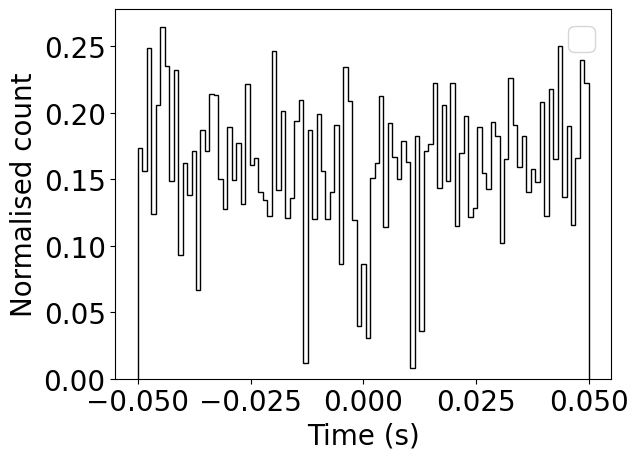

Creating directory FS_network_1/figures


<Axes: xlabel='Time (s)', ylabel='Normalised count'>

<Figure size 640x480 with 0 Axes>

In [8]:
from snudda.plotting.plot_cross_correlogram import PlotCrossCorrelogram
pcc = PlotCrossCorrelogram(os.path.join(network_path, "simulation", "output.hdf5"))
pcc.plot_all_pair_cross_correlogram(neuron_id=None, fig_file_name=os.path.join(network_path, "figures", "FS-cross-corr.png"))

ADD SHUFFLE CORRECTION